In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [139]:
X, y, c = make_blobs(500, centers=4, cluster_std=0.8, n_features=2, return_centers=True)

df_blobs = pd.DataFrame({
    'x1': X[:,0],
    'x2': X[:,1],
})

df_centers = pd.DataFrame({
    'x1': c[:,0],
    'x2': c[:,1],
})

In [140]:
X_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame({
    'x1': X_m[:,0],
    'x2': X_m[:,1],
})

### Visualizing Data

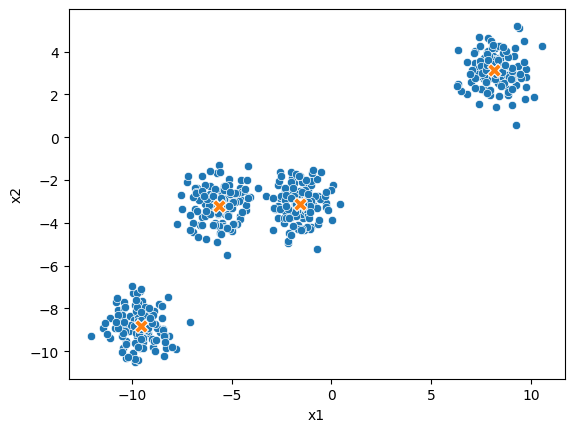

In [141]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
plt.plot()
plt.show()

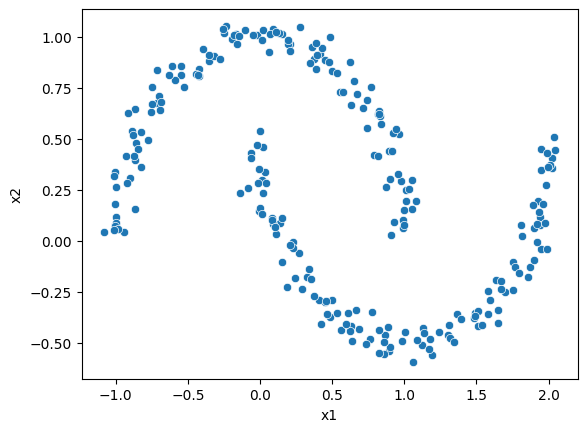

In [142]:
sns.scatterplot(data=df_moons, x='x1', y='x2')
plt.plot()
plt.show()

### Implementing DBSCAN

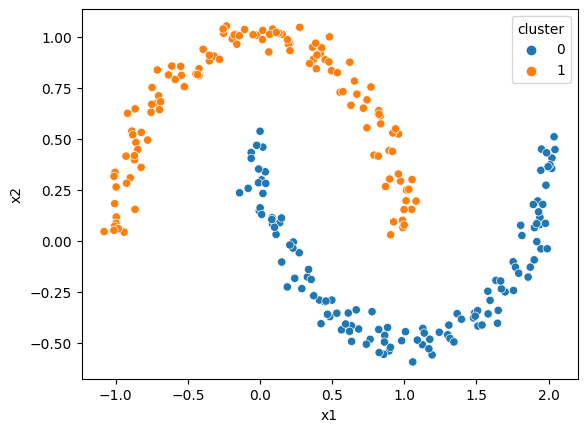

In [143]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(X_m)
df_moons['cluster'] = y_m_predict
sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

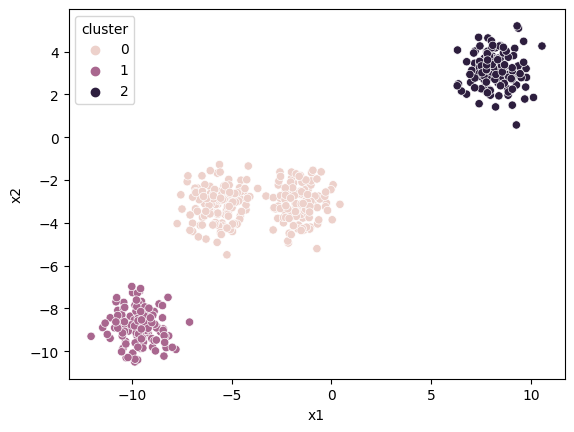

In [144]:
db_scan = DBSCAN(eps=1.5, min_samples=4)
y_predict = db_scan.fit_predict(X)
df_blobs['cluster'] = y_predict

sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.plot()
plt.show()

### Hyperparameters

In [145]:
from sklearn.neighbors import NearestNeighbors

In [146]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X)
distances, indexes = neighbors_fit.kneighbors(X)

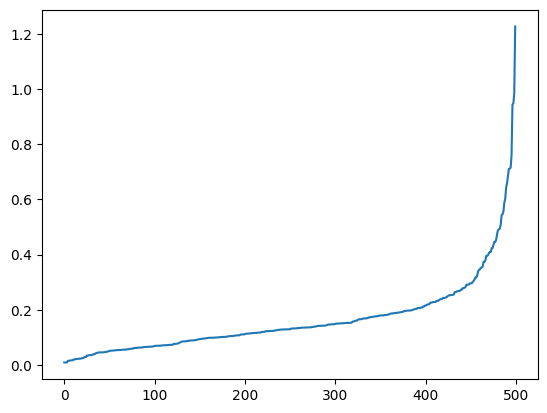

In [147]:
# We use the knee technique which are going to be the values between 0.2 and 0.5, we're going to use these values for our epsilon

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [148]:
eps_values = np.arange(0.25, 0.8, 0.10)
min_samples = np.arange(2, 10)

In [149]:
# We make a matrix
from itertools import product

dbscan_params = list(product(eps_values, min_samples))
sil_scores = []

for p in dbscan_params: 
    y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(X)
    sil_scores.append(silhouette_score(X, y_pred))

In [150]:
df_params_tuning = pd.DataFrame.from_records(dbscan_params, columns=['Eps', 'Min_samples'])
df_params_tuning['sil_scores'] = sil_scores

In [151]:
pivot_data = pd.pivot_table(df_params_tuning, values='sil_scores', index='Min_samples', columns='Eps')

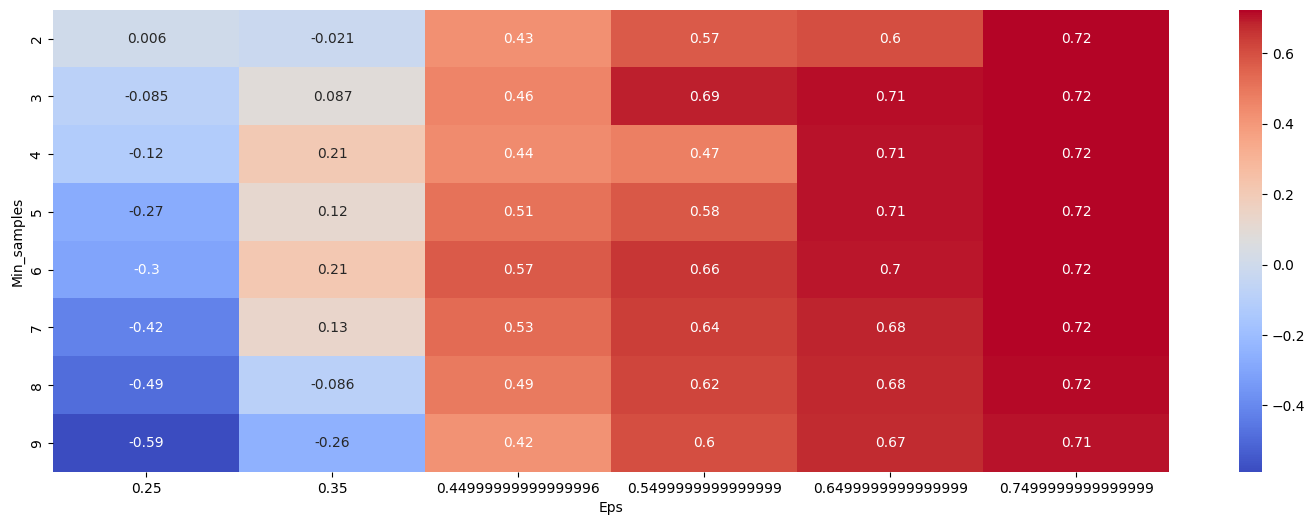

In [152]:
# DBSCAN results are better when my silhouette index is higher or more red than the others
plt.subplots(figsize=(18,6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size': 10}, cmap='coolwarm')
plt.show()

### Evaluating DBSCAN

In [163]:
dbscan_cluster = DBSCAN(eps=0.7, min_samples=3)
y_predict = dbscan_cluster.fit_predict(X)
df_blobs['cluster'] = y_predict

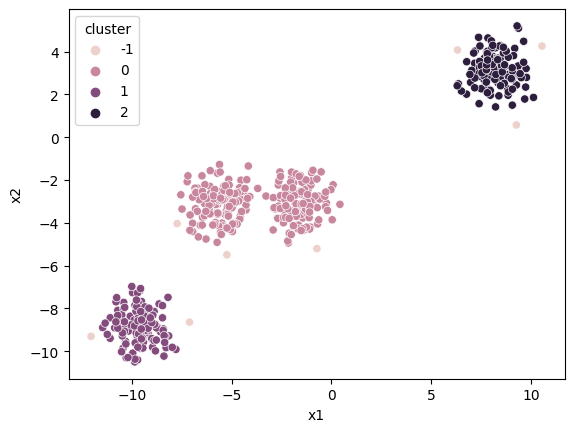

In [164]:
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.plot()
plt.show()

For n_clusters = 4 The average silhouette_score is : 0.7262443725415938


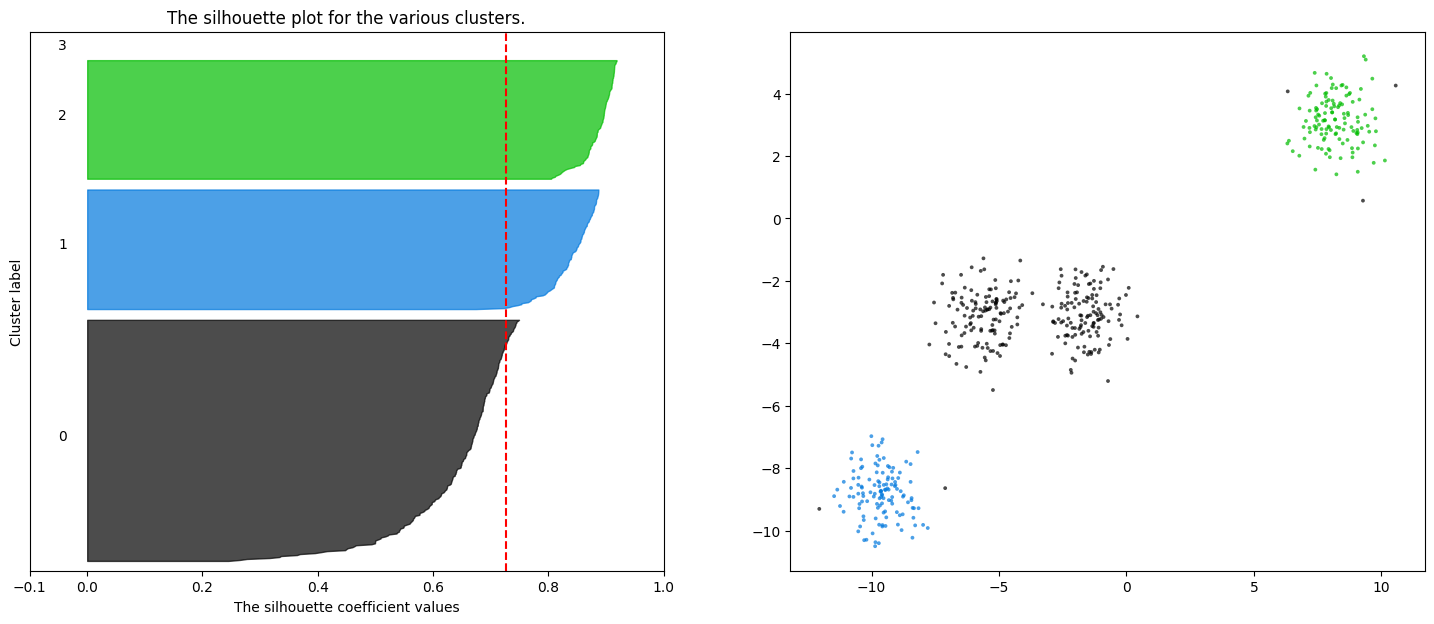

In [166]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = DBSCAN(eps=0.7, min_samples=3)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)


plt.show()